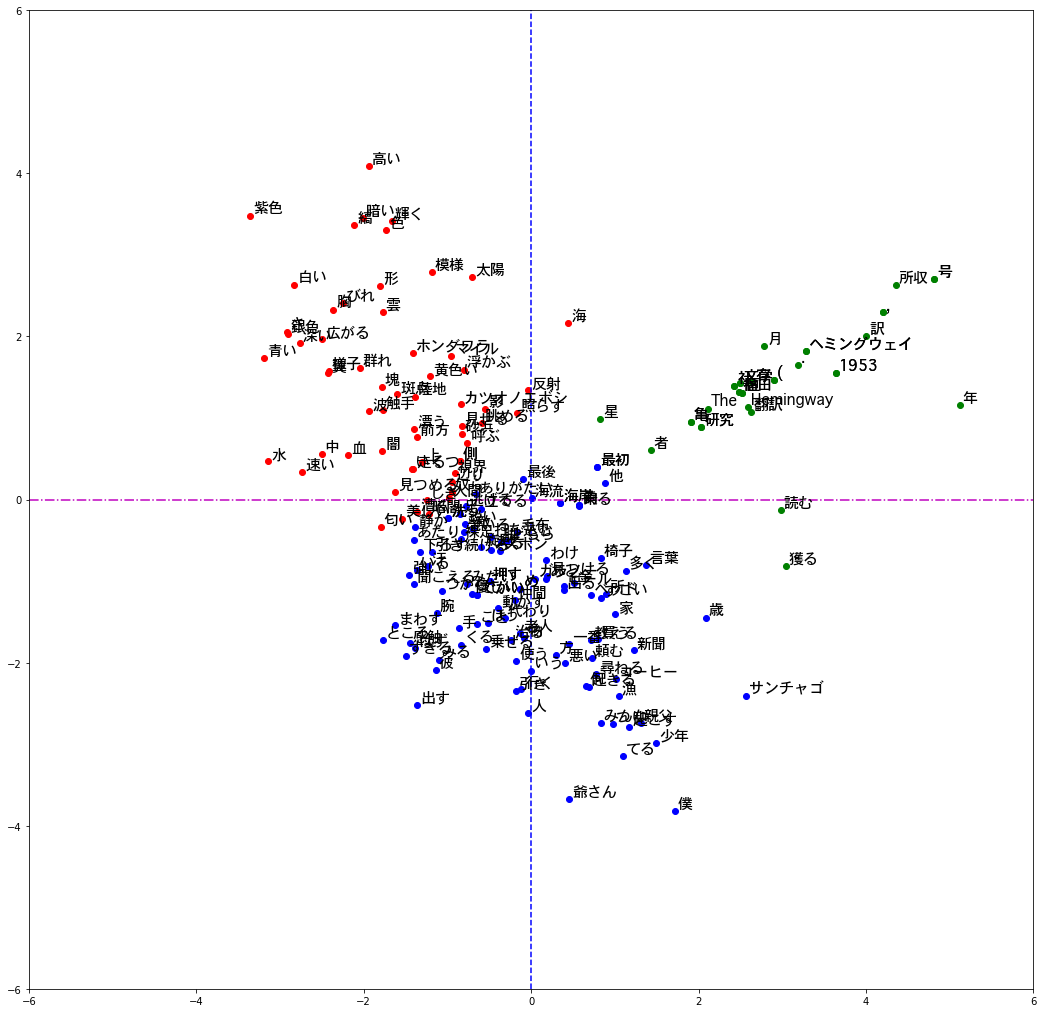

In [26]:
#AI-TECHGYM-1-12-A-2
#自然言語処理

#実行場所
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#インポート
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd

#PCA
from sklearn.decomposition import PCA

# k-means
from sklearn.cluster import KMeans

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォントの指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#モデルの読み込み
model_path = './words.model'
model = word2vec.Word2Vec.load(model_path)

#対象の単語
words = []
words.append("老人")
words.append("海")
words.append("ヘミングウェイ")
words.append("魚")
words.append("彼")

#単語ベクトルの可視化
def draw_2d_2groups(vectors, target1, target2, topn=100):
  similars1 = [w[0] for w in vectors.wv.most_similar(target1, topn=topn)]
  similars1.insert(0, target1)
  similars2 = [w[0] for w in vectors.wv.most_similar(target2, topn=topn)]
  similars2.insert(0, target2)
  similars = similars1 + similars2
  X = [vectors.wv[w] for w in similars]
  pca = PCA(n_components=2)
  Y = pca.fit_transform(X)

  df_view = pd.DataFrame(Y, columns=['x','y'])
  kmeans = KMeans(n_clusters=3, init='random')
  kmeans.fit(df_view)
  df_view['cluster'] = kmeans.labels_
  df0 = df_view[df_view['cluster'] == 0]
  df1 = df_view[df_view['cluster'] == 1]
  df2 = df_view[df_view['cluster'] == 2]

  # plt.figure(figsize=(20,20))
  plt.scatter(df0.iloc[:,0], df0.iloc[:,1], color='g')
  plt.scatter(df1.iloc[:,0], df1.iloc[:,1], color='r')
  plt.scatter(df2.iloc[:,0], df2.iloc[:,1], color='b')
  for w, x, y in zip(similars[:], Y[:,0], Y[:,1]):
    plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=15)
  plt.show()

# グラフの縦軸・横軸の目盛間隔を揃える
plt.figure(figsize = (18, 18))
plt.gca().set_xlim(-6, 6)
plt.gca().set_ylim(-6, 6)

# plt.grid(color='k', linestyle='--', linewidth=0.5)

# y=0に水平線を引く
# plt.axhline(0, ls = "-.", color = "magenta")
plt.axhline(0, ls = "-.", color = "m")

# x=0に垂直線を引く
# plt.axvline(0, ls = "--", color = "navy")
plt.axvline(0, ls = "--", color = "b")

#グラフ表示
draw_2d_2groups(model, '老人', '海')

In [28]:
print(vectors_pca.reshape(-1,1))
print(vectors_pca.T)

[[-1.62405359]
 [-1.99041941]
 [ 3.19844535]
 [ 1.4712148 ]
 [ 3.53563108]
 [-1.4531919 ]
 [-2.02366973]
 [ 3.09340928]
 [-3.08635312]
 [-1.12101277]]
[[-1.62405359  3.19844535  3.53563108 -2.02366973 -3.08635312]
 [-1.99041941  1.4712148  -1.4531919   3.09340928 -1.12101277]]


In [7]:
#アヤメデータを読み込むためのインポート
from sklearn.datasets import load_iris

#アヤメデータの取得
iris = load_iris()
x,y=load_iris(return_X_y=True)
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [12]:
#アヤメデータを読み込むためのインポート
from sklearn.datasets import load_iris

#アヤメデータの取得
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
#AI-TECHGYM-1-4-A-3
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

# データの列の絞り込み
shoppers_sub = shoppers[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(shoppers_sub)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 金融機関のデータにクラスター番号のデータを結合
shoppers_with_cluster = pd.concat([shoppers, labels], axis=1)

# 分割のための区切りを設定
bins = [0,0.2,0.4,0.6,0.8,1]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_sp = pd.cut(shoppers_with_cluster.SpecialDay, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_sp], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_sp = df.groupby(['cluster_number', 'SpecialDay']).size().unstack().fillna(0)
display(cross_cluster_sp)

# 分割のための区切りを設定
bins_2 = [1,2,3,4,5,6,7,8,9]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_r = pd.cut(shoppers_with_cluster.Region, bins_2, right=False, labels=[1,2,3,4,5,6,7,8])

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_r], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_r = df.groupby(['cluster_number', 'Region']).size().unstack().fillna(0)
display(cross_cluster_r)


SpecialDay,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster_number,,,,,
0,386,6,7,2,15
1,10,0,0,0,0
2,1096,9,28,26,20
3,2807,49,48,83,71
4,6657,114,159,240,218
5,123,0,1,0,1


Region,1,2,3,4,5,6,7,8
cluster_number,,,,,,,,
0,181,39,83,35,12,25,17,15
1,8,0,1,1,0,0,0,0
2,464,119,239,110,27,64,78,39
3,1145,302,616,302,79,212,207,120
4,2912,667,1444,727,196,500,453,260
5,70,9,20,7,4,4,6,0
